In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plotar_heatmap(arquivo,posicao,titulo): 
    sns.heatmap(arquivo, cmap="PiYG", center=0, ax=posicao).set(title=titulo)
    
def plotar_sequencia(titulo,arquivo1,arquivo2): 
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18, 4))

    fig.suptitle(titulo)

    plotar_heatmap(pd.read_csv(arquivo1),ax1,"Original")
    plotar_heatmap(pd.read_csv(arquivo2),ax2,"Alterada")
    df = pd.read_csv(arquivo2)-pd.read_csv(arquivo1)
    plotar_heatmap(df,ax3,"Diferenças")
    return df

def comparar_normalizado(pasta): 
    fig, axes = plt.subplots(1, 4, figsize=(18, 4))

    fig.suptitle(pasta)
    
    x = 0
        
    for arquivo in os.listdir(pasta):
        if arquivo.endswith(".csv"):
            data = pd.read_csv(os.path.join(pasta, arquivo))
            sns.barplot(x="index", y=data.mean(axis = 1), 
                    data=data.reset_index(), 
                    palette = 'crest', ax=axes[x]).set(title=arquivo)
            x = x+1
            continue
        else:
            continue

def plotar_barras(df):
    df = df[df.columns].apply(abs)
    df["soma"] = df[df.columns].sum(axis=1)

    sns.barplot(x="index", y="soma", data=df.reset_index(), palette = 'crest').set(title="Total de Diferenças")
    
def abrir_amostras(df):
    lista_amostras = df.index.values.tolist()

    lista_amostras

    for n_amostra in lista_amostras:
        amostra = df.loc[[n_amostra]].transpose()
        amostra = amostra.sort_values(n_amostra, ascending=False)
        #print(amostra.head())
        print("Amostra "+ str(amostra.columns.values) + " - " + amostra.index.values[0] + " - " + str(amostra.values[0]))

<h2>DoS detectados como Normais</h2>

Comparo o dataset em suas 4 versões, original, alterado, original normalizado, alterado normalizado, ploto em barras as médias.

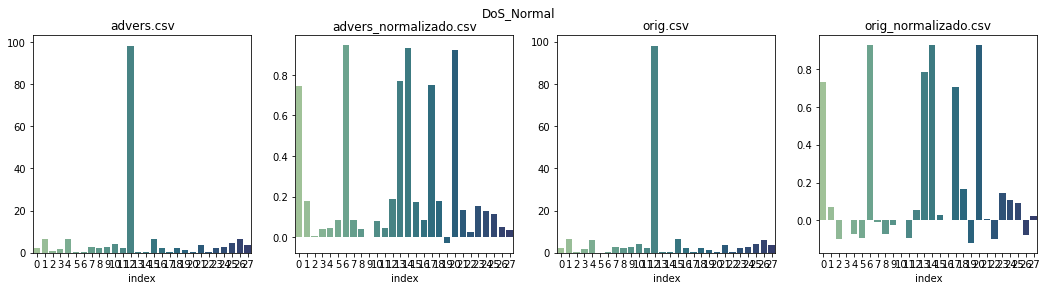

In [2]:
comparar_normalizado("DoS_Normal")

Coloco em gráficos lado a lado a amostra original, a amostra alterada e as diferenças.

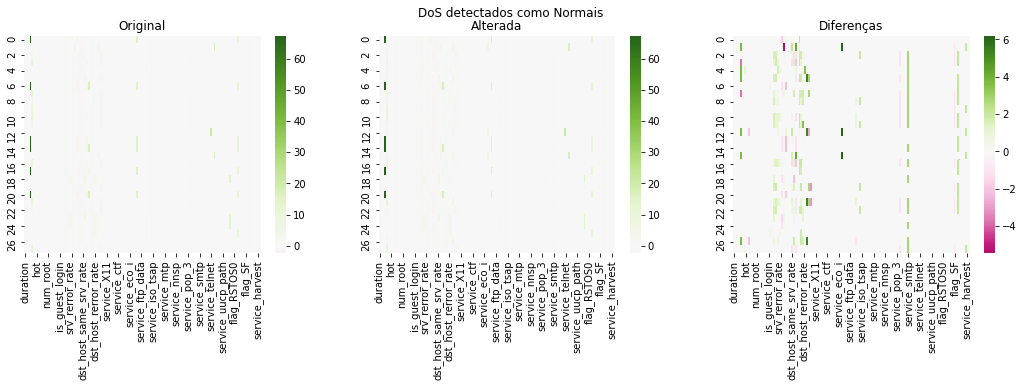

In [3]:
diferenca = plotar_sequencia("DoS detectados como Normais",
                 "DoS_Normal/orig_normalizado.csv",
                 "DoS_Normal/advers_normalizado.csv")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

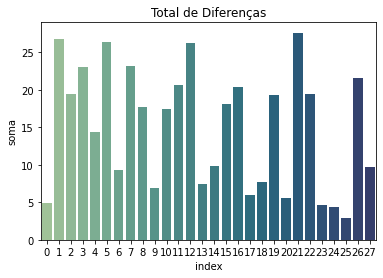

In [4]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [5]:
abrir_amostras(diferenca)

Amostra [0] - dst_host_serror_rate - [2.15794687]
Amostra [1] - service_efs - [6.19363188]
Amostra [2] - service_smtp - [2.80311003]
Amostra [3] - service_smtp - [2.80311003]
Amostra [4] - wrong_fragment - [3.74184854]
Amostra [5] - protocol_type_icmp - [5.31908454]
Amostra [6] - service_smtp - [2.80311003]
Amostra [7] - service_smtp - [2.80311003]
Amostra [8] - service_smtp - [2.80311003]
Amostra [9] - service_smtp - [2.80311003]
Amostra [10] - service_smtp - [2.80311003]
Amostra [11] - dst_host_rerror_rate - [3.52950676]
Amostra [12] - service_efs - [6.19363188]
Amostra [13] - service_http_8001 - [2.16934575]
Amostra [14] - service_smtp - [2.80311003]
Amostra [15] - service_efs - [6.19363188]
Amostra [16] - service_smtp - [2.80311003]
Amostra [17] - service_http_8001 - [2.16934575]
Amostra [18] - service_smtp - [2.80311003]
Amostra [19] - protocol_type_tcp - [2.76798537]
Amostra [20] - service_http_8001 - [2.16934575]
Amostra [21] - protocol_type_icmp - [5.31908454]
Amostra [22] - se

<h2>Normais detectados como DoS</h2>

Comparo o dataset em suas 4 versões, original, alterado, original normalizado, alterado normalizado, ploto em barras as médias.

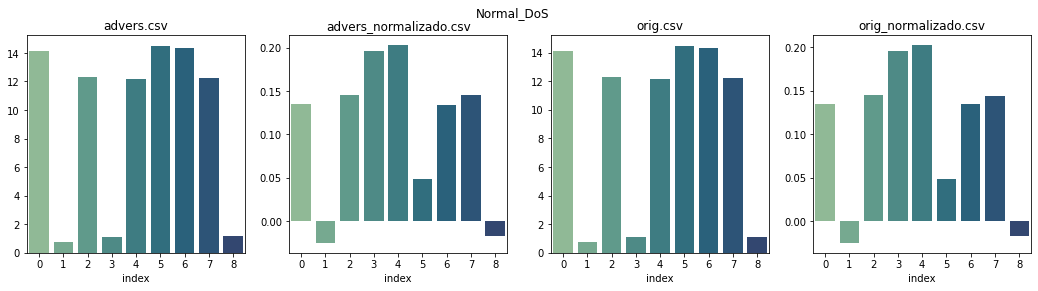

In [6]:
comparar_normalizado("Normal_DoS")

Coloco em gráficos lado a lado a amostra original, a amostra alterada e as diferenças.

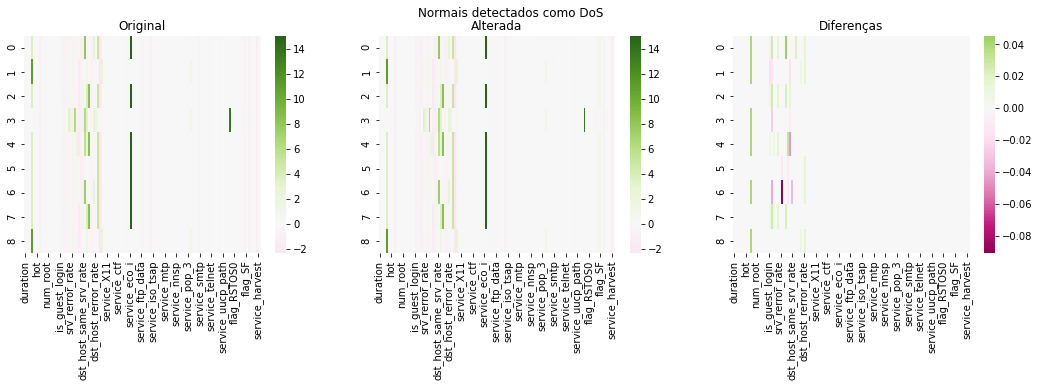

In [7]:
diferenca = plotar_sequencia("Normais detectados como DoS",
                 "Normal_DoS/orig_normalizado.csv",
                 "Normal_DoS/advers_normalizado.csv")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

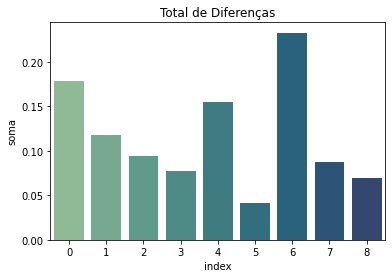

In [8]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [9]:
abrir_amostras(diferenca)

Amostra [0] - srv_diff_host_rate - [0.04532439]
Amostra [1] - num_compromised - [0.03960678]
Amostra [2] - srv_count - [0.02627726]
Amostra [3] - num_compromised - [0.03960678]
Amostra [4] - num_compromised - [0.03960678]
Amostra [5] - dst_host_srv_rerror_rate - [0.01809442]
Amostra [6] - num_compromised - [0.03960678]
Amostra [7] - srv_count - [0.02627726]
Amostra [8] - num_compromised - [0.03960678]


<h2>Probe detectados como Normais</h2>

Comparo o dataset em suas 4 versões, original, alterado, original normalizado, alterado normalizado, ploto em barras as médias.

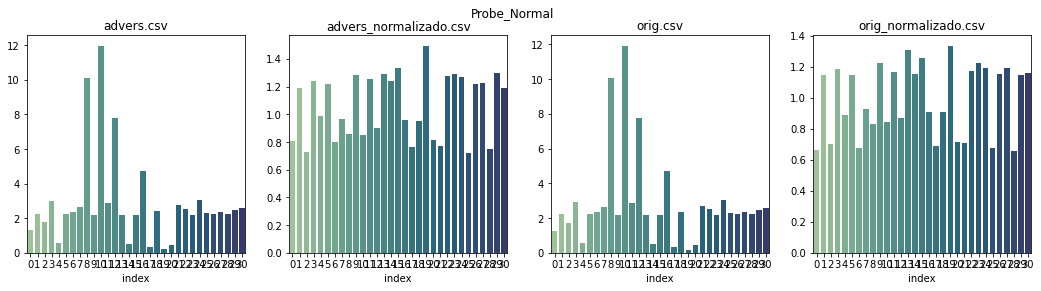

In [10]:
comparar_normalizado("Probe_Normal")

Coloco em gráficos lado a lado a amostra original, a amostra alterada e as diferenças.

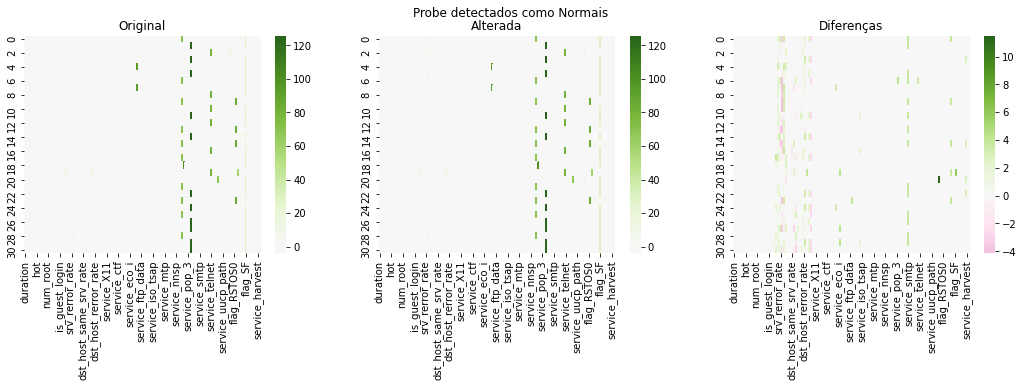

In [11]:
diferenca = plotar_sequencia("Probe detectados como Normais",
                 "Probe_Normal/orig_normalizado.csv",
                 "Probe_Normal/advers_normalizado.csv")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

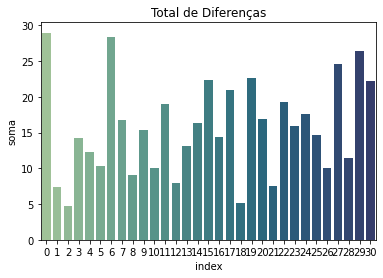

In [12]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [13]:
abrir_amostras(diferenca)

Amostra [0] - flag_S2 - [3.9088467]
Amostra [1] - service_smtp - [3.80934145]
Amostra [2] - srv_diff_host_rate - [2.46417788]
Amostra [3] - dst_host_srv_rerror_rate - [3.36903615]
Amostra [4] - diff_srv_rate - [3.35508968]
Amostra [5] - service_smtp - [3.80934145]
Amostra [6] - service_printer - [4.41126764]
Amostra [7] - diff_srv_rate - [3.76040246]
Amostra [8] - diff_srv_rate - [3.19746953]
Amostra [9] - flag_S2 - [3.9088467]
Amostra [10] - diff_srv_rate - [2.97229414]
Amostra [11] - service_smtp - [3.80934145]
Amostra [12] - diff_srv_rate - [2.9722943]
Amostra [13] - service_smtp - [3.80934145]
Amostra [14] - dst_host_srv_rerror_rate - [3.36903615]
Amostra [15] - flag_S2 - [3.9088467]
Amostra [16] - diff_srv_rate - [3.94054174]
Amostra [17] - srv_serror_rate - [3.80850978]
Amostra [18] - srv_diff_host_rate - [2.67219324]
Amostra [19] - flag_SH - [5.91555519]
Amostra [20] - flag_REJ - [11.49935884]
Amostra [21] - service_smtp - [3.80934145]
Amostra [22] - service_smtp - [3.80934145]


<h2>Normais detectados como Probe</h2>

Comparo o dataset em suas 4 versões, original, alterado, original normalizado, alterado normalizado, ploto em barras as médias.

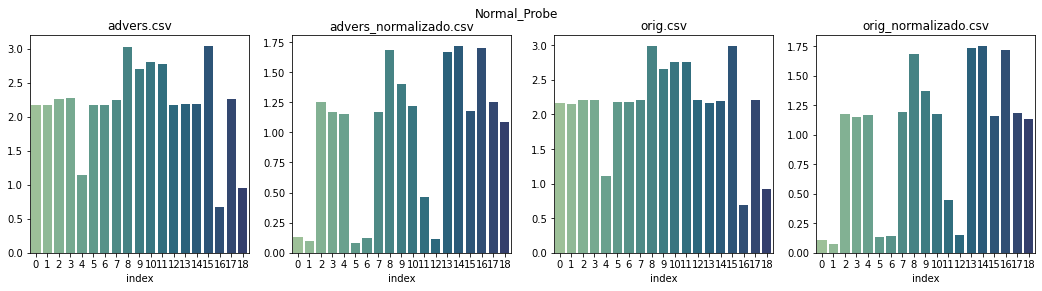

In [14]:
comparar_normalizado("Normal_Probe")

Coloco em gráficos lado a lado a amostra original, a amostra alterada e as diferenças.

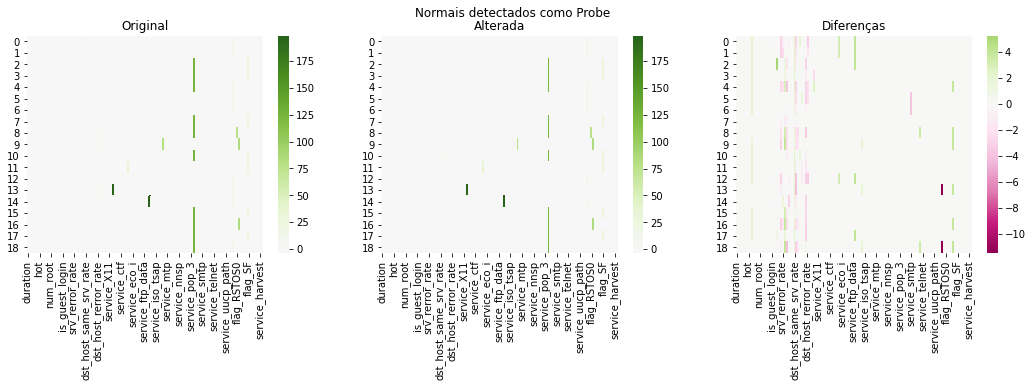

In [15]:
diferenca = plotar_sequencia("Normais detectados como Probe",
                 "Normal_Probe/orig_normalizado.csv",
                 "Normal_Probe/advers_normalizado.csv")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

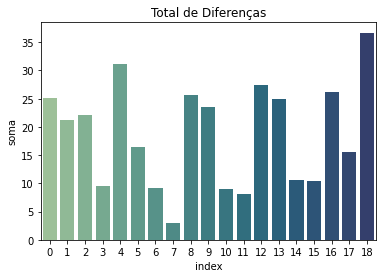

In [16]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [17]:
abrir_amostras(diferenca)

Amostra [0] - service_gopher - [4.09365898]
Amostra [1] - service_gopher - [4.09365898]
Amostra [2] - serror_rate - [5.21933184]
Amostra [3] - dst_host_same_srv_rate - [2.38036746]
Amostra [4] - flag_S2 - [3.9088467]
Amostra [5] - logged_in - [2.04728755]
Amostra [6] - logged_in - [2.04728755]
Amostra [7] - dst_host_same_src_port_rate - [0.0437482]
Amostra [8] - flag_S2 - [3.9088467]
Amostra [9] - same_srv_rate - [4.00512923]
Amostra [10] - dst_host_same_srv_rate - [2.59078662]
Amostra [11] - dst_host_same_srv_rate - [2.4987394]
Amostra [12] - service_gopher - [4.09365898]
Amostra [13] - flag_S2 - [3.9088467]
Amostra [14] - dst_host_same_srv_rate - [1.61759772]
Amostra [15] - same_srv_rate - [3.19124556]
Amostra [16] - flag_S2 - [3.9088467]
Amostra [17] - service_gopher - [4.09365898]
Amostra [18] - same_srv_rate - [3.98370236]
